In [65]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import yaml


In [66]:
conf=[filename for filename in glob.iglob("Configs/*", recursive=True)]
conf

['Configs/config_lvl2_flat_bert-base-uncased.yaml',
 'Configs/config_test.yaml',
 'Configs/config_lvl2_flat_flatt_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_t_bert-base-uncased.yaml',
 'Configs/config_lvl1_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_p_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_p_flatt_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_t_flatt_bert-base-uncased.yaml']

In [190]:
confs=['Configs/config_lvl2_flat_bert-base-uncased.yaml',
 'Configs/config_lvl2_flat_flatt_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_t_bert-base-uncased.yaml',
 #'Configs/config_lvl1_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_p_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_p_flatt_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_t_flatt_bert-base-uncased.yaml']
confs

['Configs/config_lvl2_flat_bert-base-uncased.yaml',
 'Configs/config_lvl2_flat_flatt_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_t_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_p_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_p_flatt_bert-base-uncased.yaml',
 'Configs/config_lvl2_h_t_flatt_bert-base-uncased.yaml']

In [191]:
def get_data(config):
    print(config)
    with open(config) as f:
        arguments = yaml.load(f, Loader=yaml.FullLoader)
    # --------- Setup BERT ----------
    # Name of the BERT model to use
    model_name = arguments['model_name']
    # Max length of tokens
    max_length = arguments['max_length']
    epochs = arguments['epochs']
    batch_size = arguments['batch_size']
    lvl = arguments['lvl']
    hierar = arguments['hierar']
    lable_type = arguments['lable_type']
    test_labels_type = arguments['test_labels_type']
    data_path = arguments['data_path']

    # --------- Setup logs paths ----------
    path = "saved_data/" + model_name+ "/"+data_path + "/lvl" + str(lvl) + "/trained_" + hierar + "_" + lable_type + "tested_"+test_labels_type+"/" + str(max_length) + "T_" + str(epochs) + "e/"
    files=[filename for filename in glob.iglob(path+"/*/test_pred_raw.npz", recursive=True)]
    print(files)

    accu_list=[]
    f1_score_list=[]
    for file in files:
        arr=np.load(file)
        accu_list.append(arr['accu_list'])
        f1_score_list.append(arr['f1_score_list'])
    std_f1=np.std(f1_score_list, axis=0)
    mean_f1=np.mean(f1_score_list, axis=0)
    max_f1=mean_f1+1.96*(std_f1/np.sqrt(len(mean_f1)+1))#np.max(f1_score_list, axis=0)
    min_f1=mean_f1-1.96*(std_f1/np.sqrt(len(mean_f1)+1))#np.min(f1_score_list, axis=0)

    std_acc=np.std(accu_list, axis=0)
    mean_acc=np.mean(accu_list, axis=0)
    max_accu=mean_acc+1.96*(std_acc/np.sqrt(len(mean_acc)+1))#np.max(accu_list, axis=0)
    min_accu=mean_acc-1.96*(std_acc/np.sqrt(len(mean_acc)+1))#np.min(accu_list, axis=0)
    title=files[0][29:-23]
    return title, mean_f1,std_f1,mean_acc,std_acc,max_f1,min_f1,max_accu,min_accu, lvl

In [192]:
reults=[get_data(filename) for filename in confs]

Configs/config_lvl2_flat_bert-base-uncased.yaml
['saved_data/bert-base-uncased/lvl2/trained_flatt__tested_predicted/100T_40e/Run1/test_pred_raw.npz', 'saved_data/bert-base-uncased/lvl2/trained_flatt__tested_predicted/100T_40e/Run2/test_pred_raw.npz']
Configs/config_lvl2_flat_flatt_bert-base-uncased.yaml
['saved_data/bert-base-uncased/lvl2/trained_flatt__tested__/100T_40e/Run1/test_pred_raw.npz', 'saved_data/bert-base-uncased/lvl2/trained_flatt__tested__/100T_40e/Run2/test_pred_raw.npz']
Configs/config_lvl2_h_t_bert-base-uncased.yaml
['saved_data/bert-base-uncased/lvl2/trained_hierarchical_targettested_predicted/100T_40e/Run1/test_pred_raw.npz', 'saved_data/bert-base-uncased/lvl2/trained_hierarchical_targettested_predicted/100T_40e/Run2/test_pred_raw.npz']
Configs/config_lvl2_h_p_bert-base-uncased.yaml
['saved_data/bert-base-uncased/lvl2/trained_hierarchical_predictedtested_predicted/100T_40e/Run1/test_pred_raw.npz', 'saved_data/bert-base-uncased/lvl2/trained_hierarchical_predictedteste

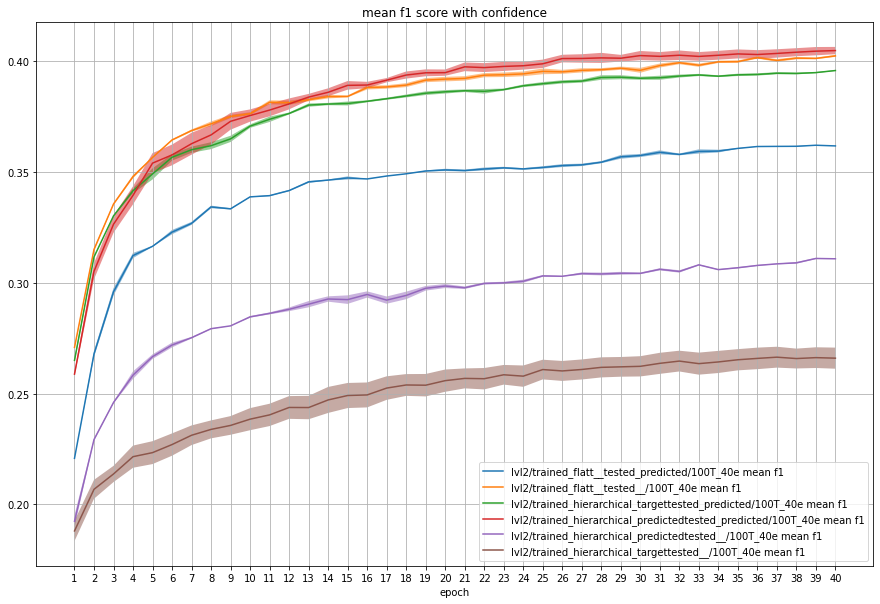

In [193]:
fig=plt.figure(figsize=(15,10))

max_len=0
for res in reults:
    x=range(1,len(res[1])+1)
    if len(res[1]) > max_len:
        max_len=len(res[1])
    plt.plot(x,res[1], label="{} mean f1".format(res[0]))
    plt.fill_between(x, res[5], res[6], alpha=0.5) #res[1]-res[2], res[1]+res[2], alpha=0.5)
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.xticks(range(1,max_len+1))
plt.title("mean f1 score with confidence")
plt.savefig('./visualizations/f1_graph.png', dpi=fig.dpi)

plt.show()

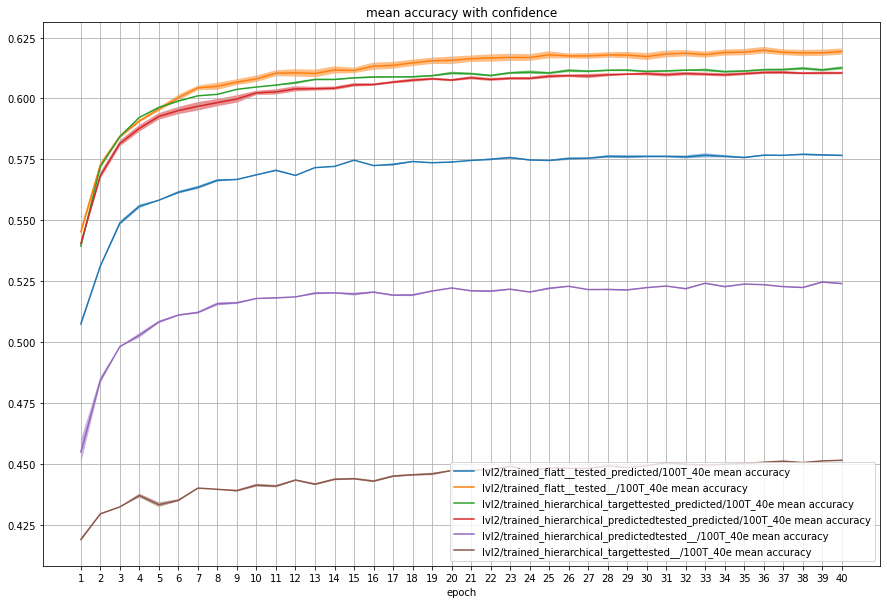

In [194]:
plt.figure(figsize=(15,10))

max_len=0
for res in reults:
    x=range(1,len(res[1])+1)
    if len(res[1]) > max_len:
        max_len=len(res[1])
    plt.plot(x,res[3], label="{} mean accuracy".format(res[0]))
    plt.fill_between(x, res[7], res[8], alpha=0.5)#res[3]-res[4], res[3]+res[4], alpha=0.5)
plt.xlabel("epoch")
plt.legend()
plt.grid()
plt.xticks(range(1,max_len+1))
plt.title("mean accuracy with confidence")
plt.savefig('./visualizations/accu_graph.png', dpi=fig.dpi)

plt.show()

In [186]:
def make_table(config):
    with open(config) as f:
        arguments = yaml.load(f, Loader=yaml.FullLoader)
    # --------- Setup BERT ----------
    # Name of the BERT model to use
    model_name = arguments['model_name']
    # Max length of tokens
    max_length = arguments['max_length']
    dataset = arguments['data_path']
    runs= arguments['repetitions']
    epochs = arguments['epochs']
    batch_size = arguments['batch_size']
    lvl = arguments['lvl']
    hierar = arguments['hierar']
    lable_type = arguments['lable_type']
    test_labels_type = arguments['test_labels_type']
    # --------- Setup logs paths ----------
    if lable_type !='_':
        lable_type+=" Cat"+str(lvl-1)+", Text"
    else:
        lable_type="Text"
    
    if test_labels_type !='_':
        test_labels_type+=" Cat"+str(lvl-1)+", Text"
    else:
        test_labels_type="Text"
    return config[8:-5],dataset,epochs,max_length,runs,lable_type,"Cat"+str(lvl),test_labels_type 

In [187]:
results=[make_table(filename) for filename in confs]
scores=[[np.max(res[1]), np.max(res[3]), res[-1]] for res in reults]# f1 , accu
data=[]
for sc in scores:
    aux=['-']*6
    aux[(sc[2]-1)*2]=np.round(sc[1],4)
    aux[(sc[2]-1)*2+1]=np.round(sc[0], 4)
    data.append(aux)


In [188]:
df=pd.DataFrame(np.hstack((results,data)), columns=["Config", "Dataset", "Epochs", "Tokens", "Runs", "Train Input", "Output", "Test Input", "Cat1 accuracy", "Cat1 F1 score macro", "Cat2 accuracy", "Cat2 F1 score macro", "Cat3 accuracy", "Cat3 F1 score macro"])
df=df.sort_values(by=['Config'])
df

,Config,Dataset,Epochs,Tokens,Runs,Train Input,Output,Test Input,Cat1 accuracy,Cat1 F1 score macro,Cat2 accuracy,Cat2 F1 score macro,Cat3 accuracy,Cat3 F1 score macro
3,config_lvl1_bert-base-uncased,amazon,20,100,2,Text,Cat1,Text,0.8264,0.8175,-,-,-,-
0,config_lvl2_flat_bert-base-uncased,amazon,40,100,2,Text,Cat2,"predicted Cat1, Text",-,-,0.5771,0.3621,-,-
1,config_lvl2_flat_flatt_bert-base-uncased,amazon,40,100,2,Text,Cat2,Text,-,-,0.6198,0.4025,-,-
4,config_lvl2_h_p_bert-base-uncased,amazon,40,100,2,"predicted Cat1, Text",Cat2,"predicted Cat1, Text",-,-,0.6107,0.4049,-,-
5,config_lvl2_h_p_flatt_bert-base-uncased,amazon,40,100,2,"predicted Cat1, Text",Cat2,Text,-,-,0.5248,0.311,-,-
2,config_lvl2_h_t_bert-base-uncased,amazon,40,100,2,"target Cat1, Text",Cat2,"predicted Cat1, Text",-,-,0.6126,0.3958,-,-
6,config_lvl2_h_t_flatt_bert-base-uncased,amazon,40,100,2,"target Cat1, Text",Cat2,Text,-,-,0.4516,0.2664,-,-


In [189]:
print(df.to_markdown()) 


|    | Config                                   | Dataset   |   Epochs |   Tokens |   Runs | Train Input          | Output   | Test Input           | Cat1 accuracy   | Cat1 F1 score macro   | Cat2 accuracy   | Cat2 F1 score macro   | Cat3 accuracy   | Cat3 F1 score macro   |
|---:|:-----------------------------------------|:----------|---------:|---------:|-------:|:---------------------|:---------|:---------------------|:----------------|:----------------------|:----------------|:----------------------|:----------------|:----------------------|
|  3 | config_lvl1_bert-base-uncased            | amazon    |       20 |      100 |      2 | Text                 | Cat1     | Text                 | 0.8264          | 0.8175                | -               | -                     | -               | -                     |
|  0 | config_lvl2_flat_bert-base-uncased       | amazon    |       40 |      100 |      2 | Text                 | Cat2     | predicted Cat1, Text | -               | -   